In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import normal
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import torch

# Generate Some Data

In [99]:
a, b = 30, 15

In [100]:
x = np.linspace(0, 100, 1000)

In [101]:
y = a * x + b

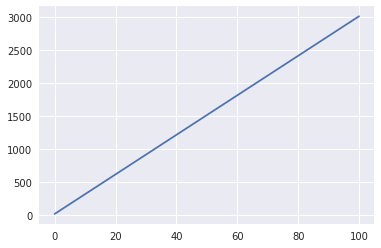

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

In [116]:
x_train = np.linspace(0, 100, 100)

In [117]:
y_train = a * x_train + b + normal(size=len(x_train))

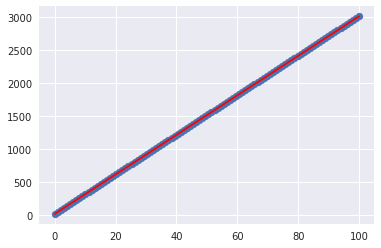

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train)
ax.plot(x, y, color="red")

# Basic SGD

In [106]:
epochs = 50000
a_hat, b_hat = 0, 0
lr = 1e-4
basic_losses = []

for i in range(epochs):
    basic_losses.append([])
    grad_as = []
    grad_bs = []
    predictions = np.dot(a_hat, x_train) + b_hat
    loss = (predictions - y_train)**2
    basic_losses[-1].append(loss.mean())
    grad_b = (2 * (predictions - y_train)).mean()
    grad_a = (2 * (predictions - y_train) * x_train).mean()
    a_hat = a_hat - grad_a * lr
    b_hat = b_hat - grad_b * lr
    if (i % 10000 == 0):
        print("The most recent avg. loss after epoch %s is %s" % (i, np.mean(basic_losses[-1])))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
print("Best loss: ", min(map(lambda x: np.mean(x), basic_losses)))

The most recent avg. loss after epoch 0 is 3060577.3116064374
a_hat is 20.25167818562907
b_hat is 0.30299507299488154
The most recent avg. loss after epoch 10000 is 19.776452355586915
a_hat is 30.133468627534512
b_hat is 6.124610991374234
The most recent avg. loss after epoch 20000 is 7.859625776850287
a_hat is 30.08249319357843
b_hat is 9.539878038970278
The most recent avg. loss after epoch 30000 is 3.540399243851789
a_hat is 30.05180413167792
b_hat is 11.595992792613108
The most recent avg. loss after epoch 40000 is 1.9749054674591013
a_hat is 30.033328202249937
b_hat is 12.833848521383567
Best loss:  1.4075285680262726


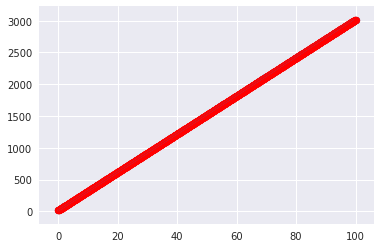

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_train * a_hat + b_hat)
ax.plot(x_train * a + b, color="red")
ax.scatter(x_train, y_train)
ax.scatter(x, y, color="red")

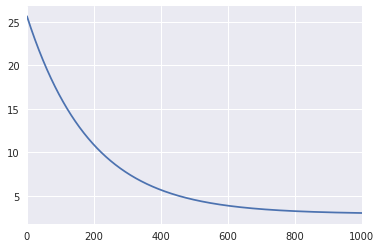

In [13]:
def plot_losses(losses, xlim=5):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(0,xlim)
    ax.plot(list(map(lambda x: np.mean(x), losses)))
plot_losses(basic_losses[1:], 1000)

In [14]:
print(a_hat, b_hat)

29.99256923512227 14.934871562451411


## SGD Basic - PyTorch Version

In [107]:
w = torch.nn.Parameter(torch.tensor([0.,0.]).double())

In [108]:
x_train_torch = torch.tensor(np.concatenate((x_train[:,np.newaxis], np.ones((len(x_train)))[:,np.newaxis]), axis=1)).double()

In [109]:
x_train_torch.shape, w.shape

(torch.Size([100, 2]), torch.Size([2]))

In [110]:
x_train_torch[:5]

tensor([[0.0000, 1.0000],
        [1.0101, 1.0000],
        [2.0202, 1.0000],
        [3.0303, 1.0000],
        [4.0404, 1.0000]], dtype=torch.float64)

In [111]:
def mse(y_true, y_pred): return ((y_true - y_pred)**2).mean()

In [115]:
y_train_torch = torch.tensor(y_train)

/home/paperspace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [113]:
lr = 1e-4
for i in range(50000):
    pred = x_train_torch@w
    loss = mse(y_train_torch, pred)
    if i % 10000 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        w.sub_(lr * w.grad)
        w.grad.zero_() 

tensor(3060577.3116, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(19.7765, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(7.8596, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(3.5404, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(1.9749, dtype=torch.float64, grad_fn=<MeanBackward1>)


# Momentum

In [142]:
epochs = 50000
a_hat, b_hat = 0., 0.
lr = 1e-4
mom = 0.9
mom_losses = []
grad_a = 0.0
grad_b = 0.0
for i in range(epochs):
    mom_losses.append([])
    iter_num = len(x_train) * i + j
    prediction = np.dot(a_hat, x_train) + b_hat
    loss = np.mean((prediction - y_train)**2)
    mom_losses[-1].append(loss)
    grad_a = np.mean(2 * (prediction - y_train) * x_train) * (1 - mom) + grad_a * mom
    grad_b = np.mean(2 * (prediction - y_train)) * (1 - mom) + grad_b * mom
    a_hat = a_hat - grad_a * lr
    b_hat = b_hat - grad_b * lr
    if (i % 10000 == 0):
        print("The most recent loss after epoch %s is %s" % (i, loss))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
# print("Best loss: ", min(mom_losses))

The most recent loss after epoch 0 is 3060464.207543531
a_hat is 2.025129188316874
b_hat is 0.030301580431714013
The most recent loss after epoch 10000 is 20.867970269894553
a_hat is 30.12982141368765
b_hat is 6.3303803084961014
The most recent loss after epoch 20000 is 8.05315776103057
a_hat is 30.076948670102453
b_hat is 9.872763862073834
The most recent loss after epoch 30000 is 3.4106126184887438
a_hat is 30.045124741889197
b_hat is 12.004912721178007
The most recent loss after epoch 40000 is 1.7287132238911138
a_hat is 30.02597002552214
b_hat is 13.28824601601219


In [121]:
def loss_list(losses):
    return list(map(lambda x: np.mean(x), losses))

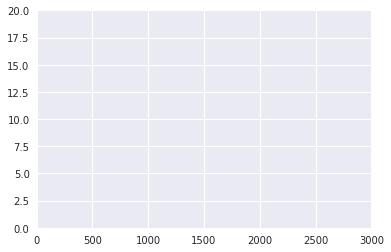

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)
# momentum_losses = losses
ax.set_xlim(0,3000)
ax.set_ylim(0,20)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
# plot_losses(losses[1:], 1000)

We see that the model converges a bit more slowly, but hits a better loss -- 1.72 v.s. 2.04.

## Momentum - PyTorch Version

In [146]:
w = torch.nn.Parameter(torch.tensor([0.,0.]).double())
lr = 1e-4
mom = 0.9
grad = torch.tensor([0,0]).double()
for i in range(50000):
    pred = x_train_torch@w
    loss = mse(y_train_torch, pred)
    if i % 10000 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        grad_mom = mom * grad + (1 - mom) * w.grad
        w.sub_(lr * grad_mom)
        grad = w.grad
        w.grad.zero_() 

tensor(3060577.3116, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(19.7782, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(7.8602, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(3.5406, dtype=torch.float64, grad_fn=<MeanBackward1>)
tensor(1.9750, dtype=torch.float64, grad_fn=<MeanBackward1>)


# RMSProp

In [98]:
epochs = 20000
a_hat, b_hat = 0, 0
lr = 1e-3
rms_param = 0.3
rms_losses = []
grad_bs = []
grad_as = []
for i in range(epochs):
    rms_losses.append([])
    for j in range(len(x_train)):
        iter_num = i * len(x_train) + j
        prediction = a_hat * x_train[j] + b_hat
        loss = (prediction - y_train[j])**2
        rms_losses[-1].append(loss)
        grad_bs.append(2 * (prediction - y_train[j]))
        grad_as.append(2 * (prediction - y_train[j]) * x_train[j])
        if (iter_num >= 10):
            a_hat = a_hat - np.divide(grad_as[iter_num]*lr, np.sqrt(rms_param*np.longdouble(grad_as[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_as[iter_num])**2))
            b_hat = b_hat - np.divide(grad_bs[iter_num]*lr, np.sqrt(rms_param*np.longdouble(grad_bs[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_bs[iter_num])**2))
        else:
            a_hat = a_hat - grad_as[iter_num] * lr
            b_hat = b_hat - grad_bs[iter_num] * lr           
    if (i % 1000 == 0):
        print("The most recent after epoch %s is %s" % (i, np.mean(rms_losses[-1])))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
print("Best loss: ", min(map(lambda x: np.mean(x), rms_losses)))

The most recent after epoch 0 is 802017.8116038730879
a_hat is 14.751660850007654506
b_hat is 2.5909878274131463779
The most recent after epoch 1000 is 2.844305886980223356
a_hat is 29.975564101891991317
b_hat is 17.235959257561684036
The most recent after epoch 2000 is 2.2803998817741332607
a_hat is 29.982413759749922543
b_hat is 16.694623823447716057
The most recent after epoch 3000 is 1.94728014045275623
a_hat is 29.987831864937153697
b_hat is 16.28757541300921167
The most recent after epoch 4000 is 1.8815974721430217491
a_hat is 29.989058841940001812
b_hat is 16.192846042445374698
The most recent after epoch 5000 is 1.8726053675090534326
a_hat is 29.98923148032457333
b_hat is 16.179368810715597841
The most recent after epoch 6000 is 1.8713847188096447777
a_hat is 29.989255009352629614
b_hat is 16.177529140099791682
The most recent after epoch 7000 is 1.8712190699593260839
a_hat is 29.989258204122919019
b_hat is 16.177279296972858658
The most recent after epoch 8000 is 1.87119659106

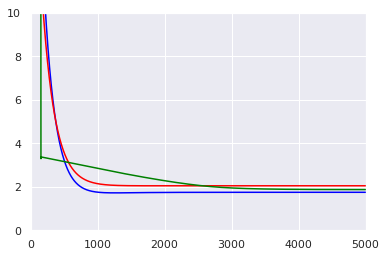

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)
# momentum_losses = losses
ax.set_xlim(0,5000)
ax.set_ylim(0,10)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
plt.plot(loss_list(rms_losses), color="green")

# Adam

In [100]:
epochs = 20000
a_hat, b_hat = 0, 0
lr = 3e-3
rms_param = 0.3
mom = 0.9
adam_losses = []
grad_bs = []
grad_as = []
for i in range(epochs):
    adam_losses.append([])
    for j in range(len(x_train)):
        iter_num = i * len(x_train) + j
        prediction = a_hat * x_train[j] + b_hat
        loss = (prediction - y_train[j])**2
        adam_losses[-1].append(loss)
        grad_bs.append(2 * (prediction - y_train[j]))
        grad_as.append(2 * (prediction - y_train[j]) * x_train[j])
        if (iter_num >= 10):
            a_hat = a_hat - (grad_as[iter_num] * (1 - mom) + grad_as[iter_num - 1] * mom) * np.divide(lr, np.sqrt(rms_param*np.longdouble(grad_as[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_as[iter_num])**2))
            b_hat = b_hat - (grad_bs[iter_num] * (1 - mom) + grad_bs[iter_num - 1] * mom) * np.divide(lr, np.sqrt(rms_param*np.longdouble(grad_bs[iter_num - 1])**2 + (1 - rms_param)*np.longdouble(grad_bs[iter_num])**2))
        else:
            a_hat = a_hat - grad_as[iter_num] * lr
            b_hat = b_hat - grad_bs[iter_num] * lr           
    if (i % 1000 == 0):
        print("The most recent after epoch %s is %s" % (i, np.mean(adam_losses[-1])))
        print("a_hat is %s" % a_hat)
        print("b_hat is %s" % b_hat)
print("Best loss: ", min(map(lambda x: np.mean(x), adam_losses)))

The most recent after epoch 0 is 19955.431978851429259
a_hat is 27.836912111528414125
b_hat is 5.63060179666048893
The most recent after epoch 1000 is 1.7871369178379331396
a_hat is 29.99174046201688297
b_hat is 15.931307885528224598
The most recent after epoch 2000 is 1.7931569036606346878
a_hat is 29.991582977362539445
b_hat is 15.9459713023267433615
The most recent after epoch 3000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 4000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 5000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 6000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 7000 is 1.7931569036606362768
a_hat is 29.991582977362539407
b_hat is 15.945971302326747281
The most recent after epoch 8000 is 1.7931569

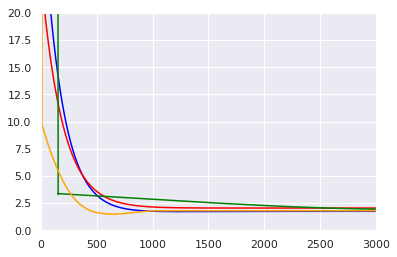

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
# momentum_losses = losses
ax.set_xlim(0,3000)
ax.set_ylim(0,20)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
plt.plot(loss_list(rms_losses), color="green")
plt.plot(loss_list(adam_losses), color="orange")

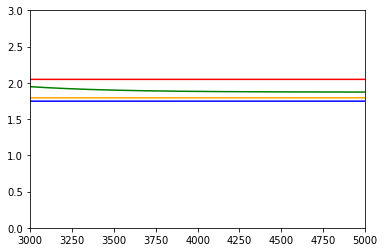

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(3000, 5000)
ax.set_ylim(0,3)
plt.plot(loss_list(mom_losses), color="blue")
plt.plot(loss_list(basic_losses), color="red")
plt.plot(loss_list(rms_losses), color="green")
plt.plot(loss_list(adam_losses), color="orange")
plt.show()

Adam gives us the same initial "pop" that we get from RMSProp, but the loss curve is much smoother, and the loss is consistently lower throughout training. Adam gives us the lowest loss overall and is consistently lower than other methods until convergence. The momentum-only model is comparable to the Adam model, but I have a strong suspicion that we could turn the learning rate down to capture some additional gains. It would be interesting to see how the different optimizers respond to follow-on training cycles with lower learning rates. 